In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [60]:
df.shape

(1338, 7)

In [5]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [16]:
print(df['region'].value_counts())
print(df['sex'].value_counts())
print(df['smoker'].value_counts())
print(df['children'].value_counts())

0    364
2    325
1    325
3    324
Name: region, dtype: int64
0    676
1    662
Name: sex, dtype: int64
0    1064
1     274
Name: smoker, dtype: int64
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


In [12]:
clean_num={'sex':{'female':1,'male':0},
          'smoker':{'no':0,'yes':1},
          'region':{'southeast':0,'northwest':1,'southwest':2,'northeast':3}}
df.replace(clean_num,inplace=True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,1,21984.47061
4,32,0,28.880,0,0,1,3866.85520


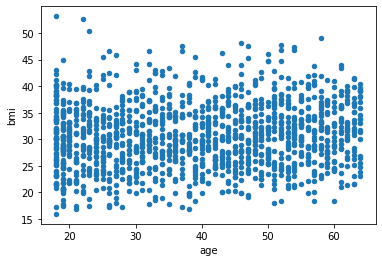

In [18]:
df.plot(kind='scatter',x='age',y='bmi')

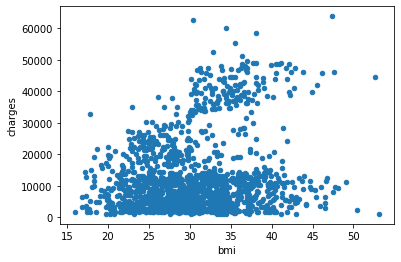

In [19]:
df.plot(kind='scatter',x='bmi',y='charges')

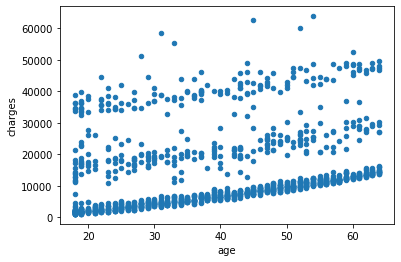

In [20]:
df.plot(kind='scatter',x='age',y='charges')

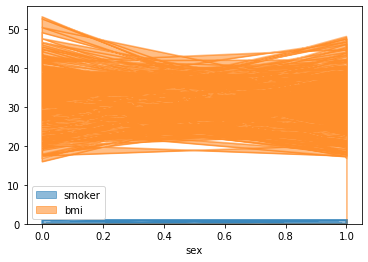

In [33]:
dff=df[['sex','smoker','bmi']]
ax=dff.plot.area(x='sex',stacked=False)

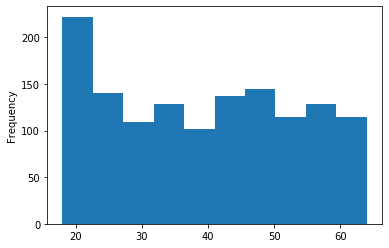

In [34]:
df['age'].plot(kind='hist')

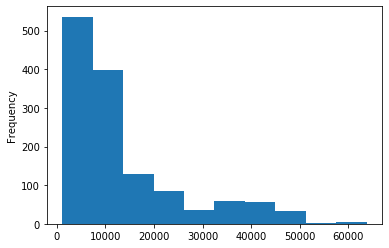

In [35]:
df['charges'].plot(kind='hist')

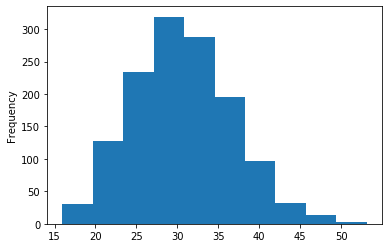

In [36]:
df['bmi'].plot(kind='hist')

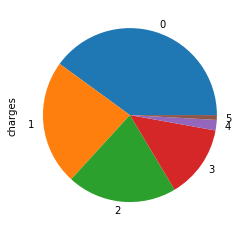

In [43]:
df_child=df.groupby('children',axis=0).sum()
df_child['charges'].plot(kind='pie')

Here we can't say that family with 5 kids pay less since our data has less of those families

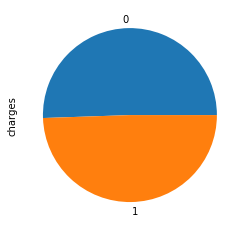

In [48]:
df_smoke=df.groupby('smoker',axis=0).sum()
df_smoke['charges'].plot(kind='pie')

we can say that smokers might be paying larger amount since they were less in number still share 1/2

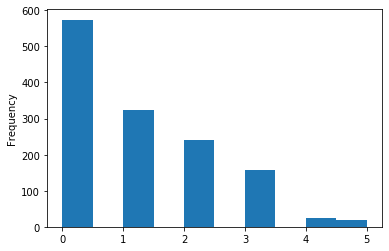

In [49]:
df['children'].plot(kind='hist')

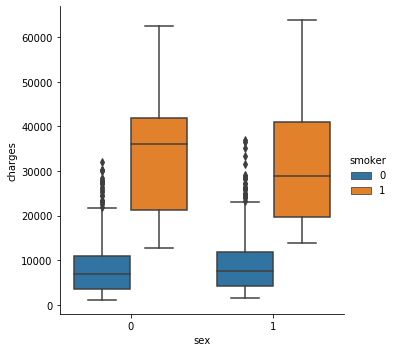

In [52]:
sns.catplot(kind='box',y='charges',x='sex',hue='smoker',data=df)

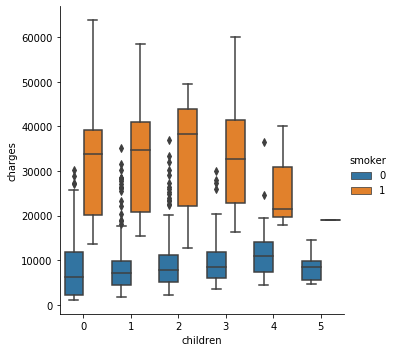

In [54]:
sns.catplot(kind='box',y='charges',x='children',hue='smoker',data=df)

In [58]:
import scipy.stats as stats
df_anov=df[['children','charges']]
df_grp=df_anov.groupby(['children'])
anv_result=stats.f_oneway(df_grp.get_group(0)['charges'],df_grp.get_group(1)['charges'])
anv_result

F_onewayResult(statistic=0.19336311485808838, pvalue=0.6602381835757414)

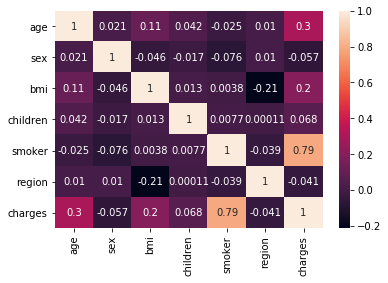

In [59]:
sns.heatmap(df.corr(),annot=True)

In [64]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scale.fit(df[['age','bmi']])
df[['age','bmi']]=scale.transform(df[['age','bmi']])

In [65]:
x=df[['age','bmi','smoker']]
y=df['charges']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [66]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
yhat=reg.predict(x_test)

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test,yhat)

0.7635045653055261

In [71]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
Input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(degree=2)),('mode',linear_model.LinearRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
yhat2=pipe.predict(x_test)
r2_score(y_test,yhat2)

0.8510346324294658